# MC estimation

A circle with radius $r$ and a square with side lengths $d = 2r$
$$
\begin{align*}
\frac{\pi}{4} = \frac{A(\text{circle})}{A(\text{square}} \\
\implies \frac{\pi}{4} = \frac{\pi r^2}{2d}\\
\implies \frac{\pi}{4} = \frac{\pi r^2}{2(2r)} \\
\implies \frac{\pi}{4} = \frac{\pi r^2}{4 r^2} \\
\implies \frac{\pi}{4} = \frac{\pi}{4} \frac{r^2}{r^2} \\
\implies \frac{\pi}{4} = \frac{\pi}{4}\\
\end{align*}
$$

In [112]:
import numpy as np
print(np.pi)

3.141592653589793


In [113]:
N = 100
X = np.random.uniform(0, 1, (N, 2))

s = 0
for i, (x, y) in enumerate(X):
    z = np.sqrt(x**2 + y**2)
    if z < 1:
        # Inside square
        s += 1
s / N

0.82

In [114]:
N = 100
X = np.random.uniform(-1, 1, (N, 2))

In [115]:
s = [1 if np.sqrt(x**2 + y**2) <= 1 else 0 for x, y in X]

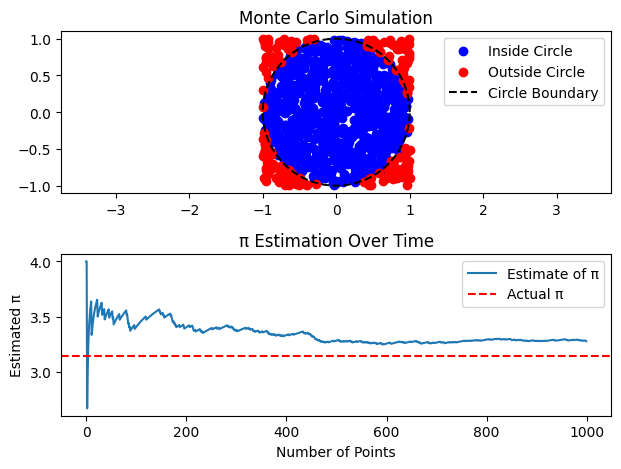

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N):
    """Generate random points in a square [-1, 1] x [-1, 1]."""
    return np.random.uniform(-1, 1, (N, 2))

def calculate_pi(X):
    """Calculate the estimate of π using Monte Carlo method."""
    distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    inside_circle = distances <= 1
    history = 4 * np.cumsum(inside_circle) / np.arange(1, len(inside_circle) + 1)
    return inside_circle, history

def visualize_results(X, inside_circle, history):
    """Visualize the points and π estimation."""
    theta = np.linspace(0, 2 * np.pi, 500)  # Circle boundary
    
    # Top plot: Scatter plot of points
    plt.subplot(2, 1, 1)
    plt.scatter(X[inside_circle, 0], X[inside_circle, 1], color='blue', label='Inside Circle')
    plt.scatter(X[~inside_circle, 0], X[~inside_circle, 1], color='red', label='Outside Circle')
    plt.plot(np.cos(theta), np.sin(theta), color='black', linestyle='--', label='Circle Boundary')
    plt.axis('equal')
    plt.title('Monte Carlo Simulation')
    plt.legend()
    
    # Bottom plot: π estimation
    plt.subplot(2, 1, 2)
    plt.plot(history, label='Estimate of π')
    plt.axhline(np.pi, color='red', linestyle='--', label='Actual π')
    plt.title('π Estimation Over Time')
    plt.xlabel('Number of Points')
    plt.ylabel('Estimated π')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main workflow
N = 1000
X = generate_data(N)
inside_circle, history = calculate_pi(X)
visualize_results(X, inside_circle, history)


ValueError: s must be a scalar, or float array-like with the same size as x and y

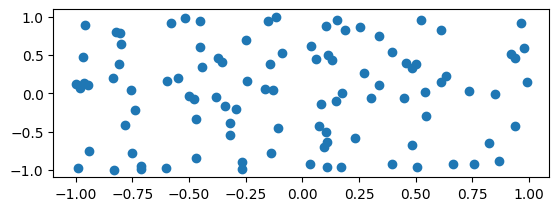

In [117]:
import matplotlib.pyplot as plt

# Generate data
N = 100
X = np.random.uniform(-1, 1, (N, 2))

# Calculate
s = [1 if np.sqrt(x**2 + y**2) <= 1 else 0 for x, y in X]

# Process
history = [4*(sum(s[1:i])/i) for i in range(1, len(s))]
theta = np.linspace(0, 2*np.pi)

# Show outputs
plt.subplot(2,1,1)
plt.scatter(X[:,0], X[:,1])
plt.scatter(np.cos(theta), np.sin(theta), 'r')

plt.subplot(2,1,2)
plt.plot(history)
plt.plot(np.pi * np.ones(N-1), 'r--')
plt.show()